In [13]:
#Importamos las librearias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [14]:
#carga archivo separado por comas y la cabecera del archivo
dataframe = pd.read_csv(r"C:/Users/Bryan Gomez/Desktop/jupyter/analisis3.csv")
dataframe.head()

,Name,Minimum,Average,Maximum,Std Dev
0,mobile_node_4,0.11111,25.111,45.833,15.166
1,mobile_node_17,0.11111,23.750,44.167,14.322
2,mobile_node_16,0.13889,23.583,46.667,14.318
3,mobile_node_8,0.11111,22.167,42.778,13.291
4,mobile_node_1,0.11111,21.889,40.278,13.121


Name
mobile_node_0     1
mobile_node_1     1
mobile_node_10    1
mobile_node_11    1
mobile_node_12    1
mobile_node_13    1
mobile_node_14    1
mobile_node_15    1
mobile_node_16    1
mobile_node_17    1
mobile_node_18    1
mobile_node_2     1
mobile_node_3     1
mobile_node_4     1
mobile_node_5     1
mobile_node_6     1
mobile_node_7     1
mobile_node_8     1
mobile_node_9     1
dtype: int64


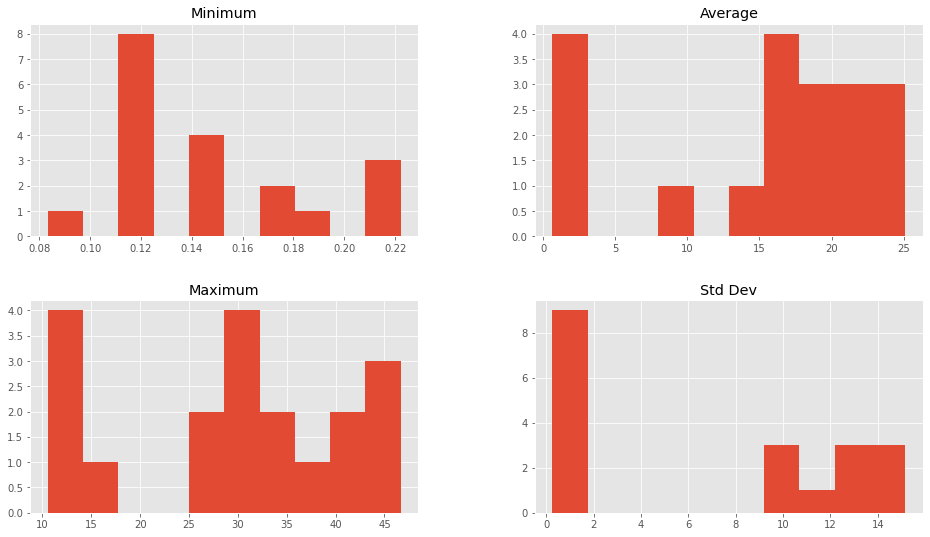

C:\Users\Bryan Gomez\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Bryan Gomez\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Bryan Gomez\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Bryan Gomez\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Bryan Gomez\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Bryan Gomez\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Da

C:\Users\Bryan Gomez\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Bryan Gomez\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Bryan Gomez\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Bryan Gomez\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Bryan Gomez\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Bryan Gomez\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance;

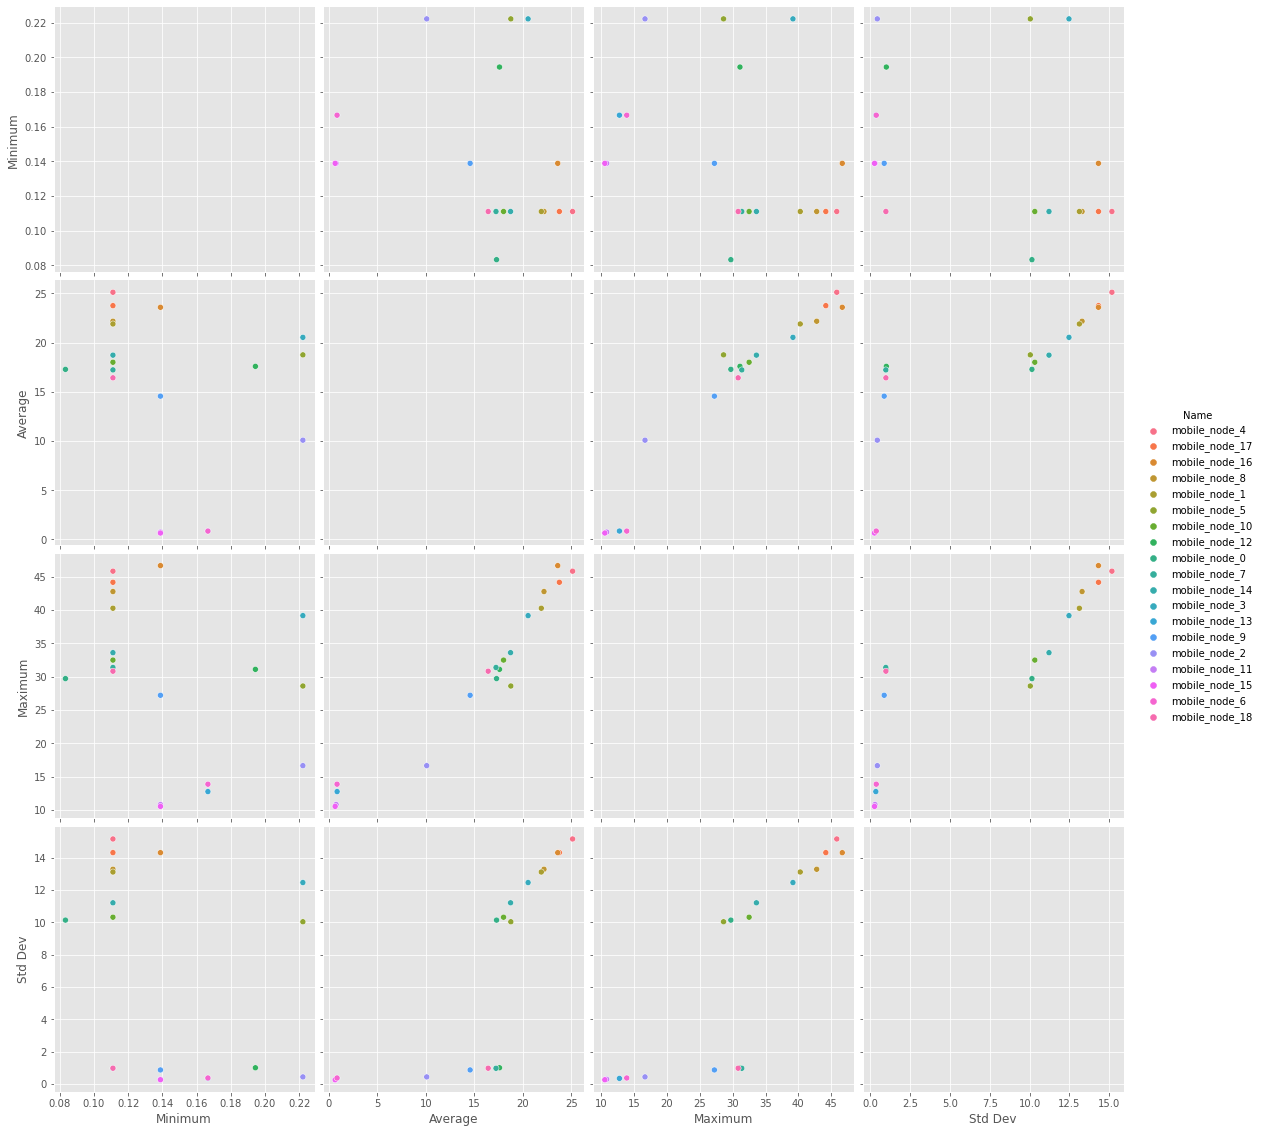

In [15]:
# Datos del archivo separado por comas
dataframe.describe()

print(dataframe.groupby('Name').size())


dataframe.drop(['Name'],1).hist()
plt.show()

sb.pairplot(dataframe.dropna(), hue='Name',size=4,vars=["Minimum","Average","Maximum","Std Dev"],kind='scatter')

In [16]:
#Estructura de datos a utilizar 19 columnas y 3 filas
X = np.array(dataframe[["Minimum","Average","Maximum","Std Dev"]])
y = np.array(dataframe['Name'])
X.shape

(19, 4)

In [17]:
#imprime los centroides
kmeans = KMeans(n_clusters=2).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 0.13491929 19.68257143 35.99207143  9.15709286]
 [ 0.166668    2.63604    12.9446      0.33528   ]]


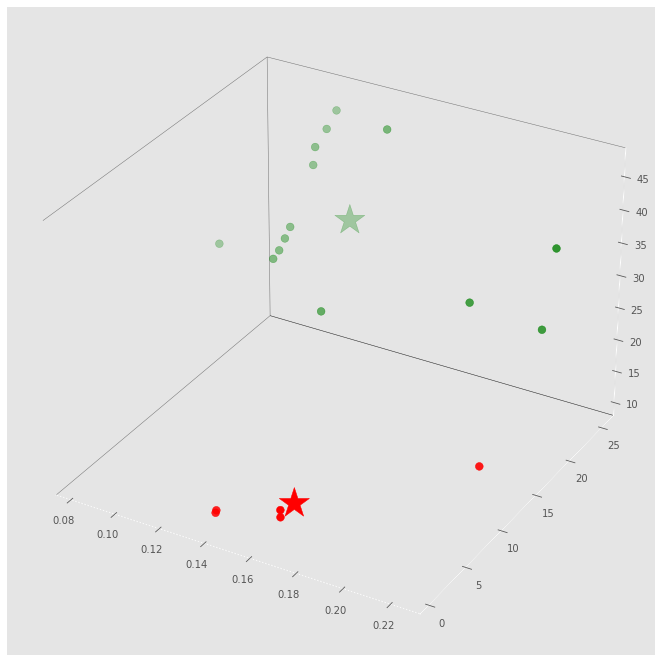

In [73]:
# Predecir los clusters
labels = kmeans.predict(X)
# Conseguir los centros de los clusters
C = kmeans.cluster_centers_
colores=['green','red']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')
ax.grid(False)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000) 


In [16]:
#Muestra en tabla la cantidad de nodos en cada cluster
copy =  pd.DataFrame()
copy['Name']=dataframe['Name'].values
copy['Std Dev']=dataframe['Std Dev'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad de nodos']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad de nodos
0,green,14
1,red,5
